In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set dataset directory
d_dir = 'datasets'

In [18]:
# Read data file
input_file = f'{d_dir}/mawi_flows.csv'
flows = pd.read_csv(input_file)

In [19]:
flows.head()

,start_time,end_time,source_ip,destination_ip,source_ip_int,destination_ip_int,protocol,source_port,destination_port,first_pkt_size,max_iat,flow_duration,packet_count,flow_class,idle_timeout
0,1688187600,1688187685,149.40.55.233,203.115.138.41,2502440937,3413346857,6,1999,54524,66,19,85,12,3,11
1,1688187600,1688187692,202.11.248.134,52.113.75.222,3389782150,879840222,17,50005,3479,183,1,92,4697,3,1
2,1688187600,1688187606,45.100.248.16,202.249.92.162,761591824,3405339810,6,44734,443,54,4,6,4,2,4
3,1688187600,1688187600,38.88.114.91,163.37.23.124,643330651,2737117052,6,43332,3128,54,0,0,1,1,1
4,1688187600,1688187600,163.37.117.124,38.186.128.63,2737141116,649756735,6,61554,443,85,0,0,2,1,1


In [20]:
flows.describe()

,start_time,end_time,source_ip_int,destination_ip_int,protocol,source_port,destination_port,first_pkt_size,max_iat,flow_duration,packet_count,flow_class,idle_timeout
count,1.518390e+06,1.518390e+06,1.518390e+06,1.518390e+06,1.518390e+06,1.518390e+06,1.518390e+06,1.518390e+06,1.518390e+06,1.518390e+06,1.518390e+06,1.518390e+06,1.518390e+06
mean,1.688188e+09,1.688188e+09,2.311884e+09,2.654617e+09,7.132311e+00,3.381644e+04,1.464118e+04,7.751670e+01,2.050503e+00,4.609406e+00,5.720592e+00,1.219998e+00,1.906186e+00
std,2.745933e+01,2.753459e+01,1.041342e+09,7.245492e+08,3.342648e+00,2.147831e+04,1.889410e+04,9.842325e+01,7.248938e+00,1.498236e+01,2.298705e+02,5.418020e-01,2.648128e+00
min,1.688188e+09,1.688188e+09,1.679778e+07,1.787560e+07,6.000000e+00,0.000000e+00,0.000000e+00,5.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.688188e+09,1.688188e+09,1.542486e+09,2.242426e+09,6.000000e+00,8.964000e+03,4.450000e+02,5.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.688188e+09,1.688188e+09,2.721616e+09,2.737134e+09,6.000000e+00,4.191700e+04,6.007000e+03,5.800000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.688188e+09,1.688188e+09,3.296838e+09,3.405339e+09,6.000000e+00,5.179500e+04,2.130700e+04,6.600000e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
max,1.688188e+09,1.688188e+09,3.757533e+09,3.757533e+09,1.700000e+01,6.553500e+04,6.553500e+04,4.410000e+03,9.100000e+01,9.200000e+01,1.421080e+05,3.000000e+00,1.100000e+01


In [21]:
flows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518390 entries, 0 to 1518389
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   start_time          1518390 non-null  int64 
 1   end_time            1518390 non-null  int64 
 2   source_ip           1518390 non-null  object
 3   destination_ip      1518390 non-null  object
 4   source_ip_int       1518390 non-null  int64 
 5   destination_ip_int  1518390 non-null  int64 
 6   protocol            1518390 non-null  int64 
 7   source_port         1518390 non-null  int64 
 8   destination_port    1518390 non-null  int64 
 9   first_pkt_size      1518390 non-null  int64 
 10  max_iat             1518390 non-null  int64 
 11  flow_duration       1518390 non-null  int64 
 12  packet_count        1518390 non-null  int64 
 13  flow_class          1518390 non-null  int64 
 14  idle_timeout        1518390 non-null  int64 
dtypes: int64(13), object(2)
memory u

In [22]:
# Features
unique_src_ips = len(flows['source_ip'].unique())
unique_dst_ips = len(flows['destination_ip'].unique())

unique_src_ports = len(flows['source_port'].unique())
unique_dst_ports = len(flows['destination_port'].unique())

unique_protocols = len(flows['protocol'].unique())

print(f'Unique Source IPs: {unique_src_ips}, Unique Destination IPs: {unique_dst_ips}')
print(f'Unique Source Ports: {unique_src_ports}, Unique Destination Ports: {unique_dst_ports}')
print(f'Unique Protocols: {unique_protocols}')

Unique Source IPs: 103561, Unique Destination IPs: 261814
Unique Source Ports: 65479, Unique Destination Ports: 64919
Unique Protocols: 2


In [23]:
flows['idle_timeout'].value_counts()

idle_timeout
1     1322070
11      88210
4       21363
2       18775
8       15163
9       15087
3       11325
5        9353
10       8798
6        4577
7        3669
Name: count, dtype: int64

In [24]:
flows['flow_class'].value_counts()

flow_class
1    1276931
2     148875
3      92584
Name: count, dtype: int64

In [25]:
flows['flow_class'].value_counts()/flows.shape[0]*100

flow_class
1    84.097696
2     9.804793
3     6.097511
Name: count, dtype: float64

In [26]:
flows['idle_timeout'].value_counts()/flows.shape[0]*100

idle_timeout
1     87.070515
11     5.809443
4      1.406951
2      1.236507
8      0.998624
9      0.993618
3      0.745856
5      0.615981
10     0.579430
6      0.301438
7      0.241638
Name: count, dtype: float64

In [35]:
flows = flows.drop('source_ip', axis=1)
flows = flows.drop('destination_ip', axis=1)

In [ ]:
idle_timeout = flows['idle_timeout']
pkt_size = flows['first_pkt_size']

fg, ax = plt.subplots()
ax.set_xlabel('Idle Timeout (s)')
ax.set_ylabel('First Packet Size')
ax.set_xticks([0, 1, 2], ['Small', 'Medium', 'Long'])

ax.bar(idle_timeout, pkt_size)

In [ ]:
flow_class = flows['flow_class']
idle_timeout = flows['idle_timeout']

fg, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel('Elephant Flows')
ax.set_xlabel('First Packet Size (MBs)')
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_yticks([0, 1, 2], ['Small', 'Medium', 'Long'])

ax.plot(idle_timeout, flow_class, marker='x', s=200)
plt.show()

In [36]:
# Finding relation between columns (correlation between columns)
data_corr = flows.corr()
print(data_corr)

                    start_time  end_time  source_ip_int  destination_ip_int  \
start_time            1.000000  0.851559       0.017983            0.034921   
end_time              0.851559  1.000000       0.021102           -0.021708   
source_ip_int         0.017983  0.021102       1.000000           -0.256446   
destination_ip_int    0.034921 -0.021708      -0.256446            1.000000   
protocol             -0.022867 -0.056294      -0.056054           -0.049002   
source_port           0.079632 -0.024000      -0.148686            0.249941   
destination_port     -0.019717  0.026804       0.174615           -0.261742   
first_pkt_size       -0.076196 -0.075627      -0.094051           -0.085428   
max_iat              -0.206044  0.249179       0.001735           -0.087342   
flow_duration        -0.267779  0.277084       0.005822           -0.103897   
packet_count         -0.014311  0.015736       0.001344           -0.008656   
flow_class           -0.236233  0.210842       0.028

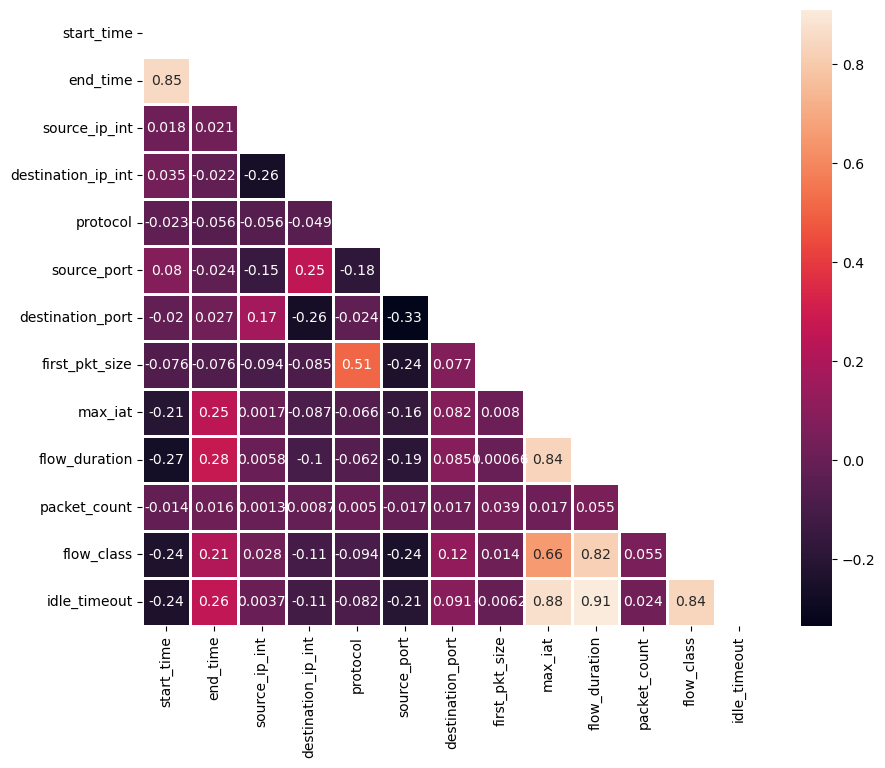

In [37]:
plt.figure(figsize=(10, 8))
matrix = np.triu(data_corr)
sns.heatmap(data_corr, annot = True, linewidth = 0.8, mask = matrix, cmap = 'rocket')
plt.show()

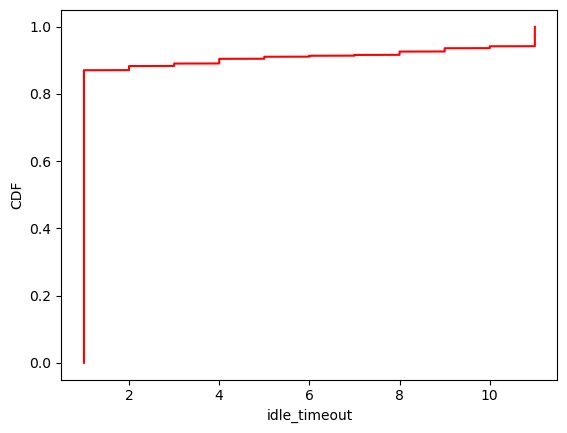

In [39]:
x_column = 'idle_timeout'
y_column = 'CDF'

fg, ax = plt.subplots()
ax.set_xlabel(x_column)
ax.set_ylabel(y_column)

# ax.set_ylim([0.4, 1])
# ax.set_xlim([0, 60])

x = sorted(flows[x_column])
records_count = len(x)
y = np.arange(records_count) / float(records_count)

ax.plot(x, y, marker = '', color='r')